In [40]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
from IPython.display import set_matplotlib_formats

set_matplotlib_formats('png', 'pdf')
rcParams['figure.figsize'] = 12, 8
# Larger font size
rcParams.update({'font.size': 18})

In [67]:
import matplotlib
import time
formatter = matplotlib.ticker.FuncFormatter(lambda s, x: time.strftime('%M:%S', time.gmtime(s)))

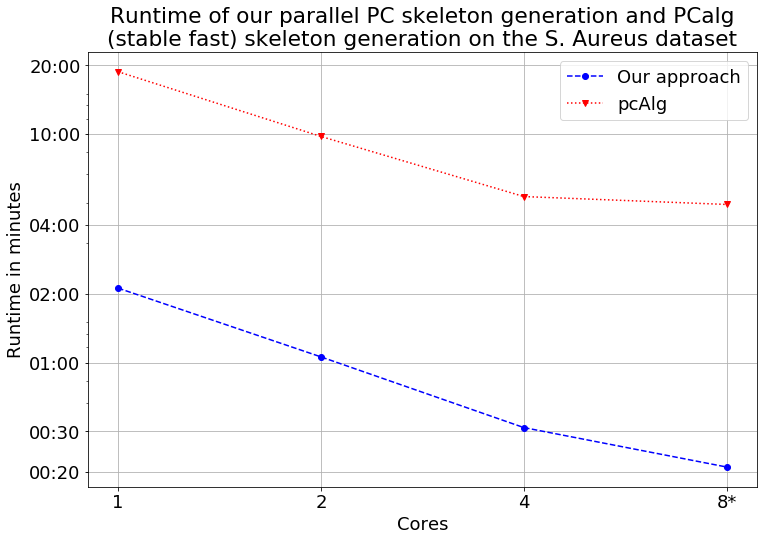

In [273]:
# saureus
runtimes_ours = (127.0212375, 63.5242382, 31.1583786, 20.93722161)
runtimes_pcalg = (1124.038, 585.406, 319.453, 295.007)

index_labels = (1, 2, 4, '8*')
index = range(len(index_labels))

fig, ax = plt.subplots()
# title & axis labels
ax.set_xlabel('Cores')
ax.set_ylabel('Runtime in minutes')
ax.set_title('Runtime of our parallel PC skeleton generation and PCalg\n(stable fast) skeleton generation on the S. Aureus dataset')
# plots
ax.plot(runtimes_ours, linestyle='--', marker='o', color='b', label='Our approach')
ax.plot(runtimes_pcalg, linestyle=':', marker='v', color='r', label='pcAlg')
# logscale
ax.set_yscale('log')
ax.set_yticks((20, 30, 60, 120, 240, 600, 1200))
ax.get_yaxis().set_major_formatter(formatter)
# tick labels
ax.set_xticks(index)
ax.set_xticklabels(index_labels)
#plt.yticks(np.arange(60, max(runtimes_pcalg)+60, 120.0))
#ax.yaxis.set_major_formatter(formatter)
# legend
ax.legend()
#grid
ax.grid()

plt.savefig('../../1to8_with_pcalg_logy_mins.eps', format='eps', dpi=1000)
plt.show()

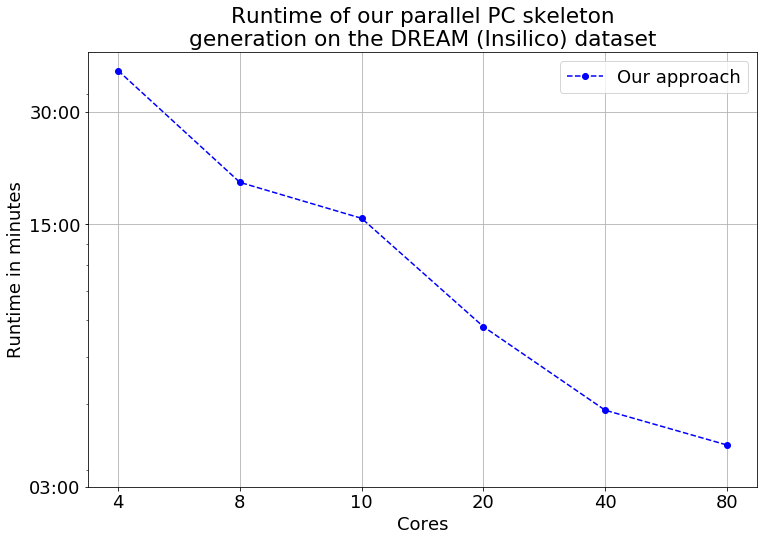

In [236]:
# DREAM
runtimes = (
    2313.310906, # 4 cores
    1165.596693, # 8 cores
    934.6390598, # 10 cores
    480.883714,  # 20 cores
    288.0406234, # 40 cores
    232.6862128  # 80 cores
)


index_labels = (4, 8, 10, 20, 40, 80)
index = range(len(index_labels))

fig, ax = plt.subplots()
# title & axis labels
ax.set_xlabel('Cores')
ax.set_ylabel('Runtime in minutes')
ax.set_title('Runtime of our parallel PC skeleton\ngeneration on the DREAM (Insilico) dataset')
# plots
ax.plot(runtimes, linestyle='--', marker='o', color='b', label='Our approach')
# y axis
ax.set_yscale('log')
ax.set_yticks((180, 1800, 900))
#plt.yticks(np.arange(120, max(runtimes)+60, 240.0))
ax.get_yaxis().set_major_formatter(formatter)
# x axis
#ax.set_xscale('log')
ax.set_xticks(index)
ax.set_xticklabels(index_labels)
# legend
ax.legend()
#grid
ax.grid()

plt.savefig('../../dream_10to80_mins.eps', format='eps', dpi=1000)
plt.show()

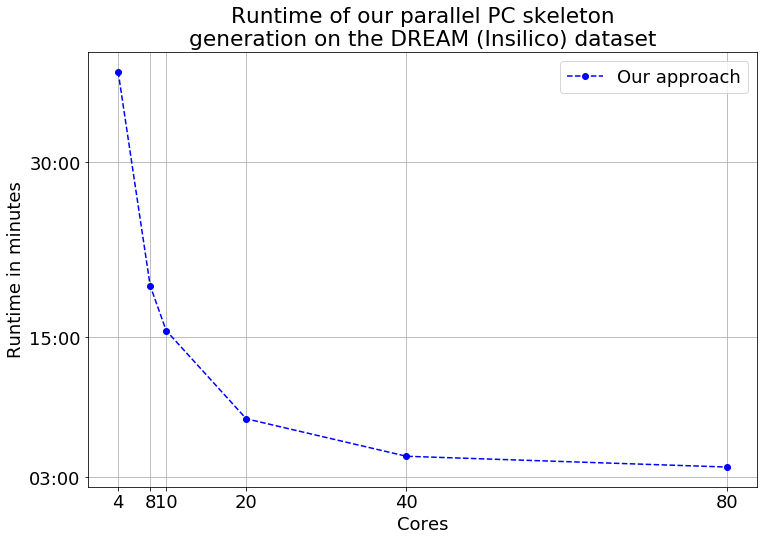

In [253]:
# DREAM
runtimes = (
    2266.926631, # 4 cores
    1165.596693, # 8 cores
    934.6390598, # 10 cores
    480.883714,  # 20 cores
    288.0406234, # 40 cores
    232.6862128  # 80 cores
)


index_labels = (4, 8, 10, 20, 40, 80)
index = range(len(index_labels))

fig, ax = plt.subplots()
# title & axis labels
ax.set_xlabel('Cores')
ax.set_ylabel('Runtime in minutes')
ax.set_title('Runtime of our parallel PC skeleton\ngeneration on the DREAM (Insilico) dataset')
# plots
ax.plot(index_labels, runtimes, linestyle='--', marker='o', color='b', label='Our approach')
# y axis
#ax.set_yscale('log')
ax.set_yticks((180, 1800, 900))
#plt.yticks(np.arange(120, max(runtimes)+60, 240.0))
ax.get_yaxis().set_major_formatter(formatter)
# x axis
#ax.set_xscale('log')
ax.set_xticks(index_labels)
ax.set_xticklabels(index_labels)
# legend
ax.legend()
#grid
ax.grid()

plt.savefig('../../dream_4to80_mins.eps', format='eps', dpi=1000)
plt.show()

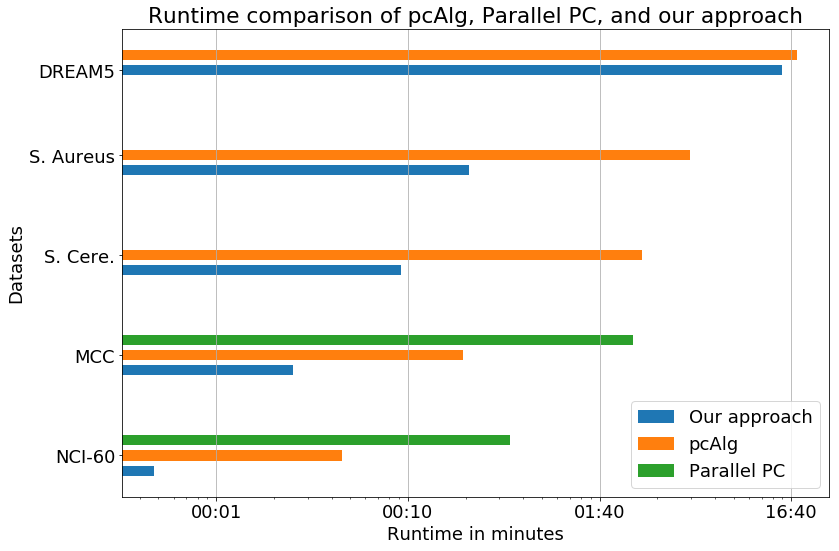

In [254]:
# Runtimes on data sets with 8 cores

# always on 8 cores
datasets = ['NCI-60', 'MCC', 'S. Cere.', 'S. Aureus', 'DREAM5']
# order: NCI-60, MCC, Scerevisae, Saureus, DREAM
ours = (0.475890256, 2.502414812, 9.200878044, 20.93722161, 894.2895717)
pcalg = (4.551, 19.340, 166.136, 295.007, 1067.859)
parpc = (33.971, 148.837) # Scerevisae, Saureus, DREAM missing

bar_width = 0.1
offset = 0.05
index = np.arange(len(datasets))

fig, ax = plt.subplots()

rects_draw = ax.barh(range(len(datasets)), ours, bar_width, label="Our approach")
rects_draw = ax.barh(np.arange(len(datasets)) + bar_width + offset, pcalg, bar_width, label="pcAlg")
rects_draw = ax.barh(np.arange(2) + 2*bar_width + 2*offset, parpc, bar_width, label="Parallel PC")
plt.yticks(np.append(np.arange(4) + bar_width + offset, 4), datasets)

# title & axis labels
ax.set_xlabel('Runtime in minutes')
ax.set_ylabel('Datasets')
ax.set_title('Runtime comparison of pcAlg, Parallel PC, and our approach')

# x axis
ax.xaxis.grid()

# y axis
ax.set_xscale('log')
ax.get_xaxis().set_major_formatter(formatter)
ax.set_yticklabels(datasets)

plt.legend()

plt.tight_layout()
plt.savefig('../../runtime_comparison_log.eps', format='eps', dpi=1000)
plt.show()